
# Glaucoma Visual Field EDA — Shared Version

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
vf_df = pd.read_csv("VF_Data.csv")
series_df = pd.read_csv("Series_Summary.csv")
coord_df = pd.read_csv("Coord_242.csv")
vf_df.head()

,PatID,Gender,Eye,FieldN,Age,Time_from_Baseline,MS,MS_Cluster1,MS_Cluster2,MS_Cluster3,...,PD_45,PD_46,PD_47,PD_48,PD_49,PD_50,PD_51,PD_52,PD_53,PD_54
0,647,F,Right,1,52.7967,0.0000,27.832885,25.57750,26.979231,30.588333,...,-1.92,-0.36,-0.44,-1.52,-0.03,-1.06,0.75,-1.33,-2.02,-0.61
1,647,F,Right,2,53.8234,1.0267,30.131346,27.76000,29.911538,33.263333,...,-0.54,-1.13,-1.81,-1.74,-2.19,-1.23,-4.85,-2.24,0.00,0.28
2,647,F,Right,3,54.8857,2.0890,29.454808,25.47500,29.826154,32.488333,...,-0.07,1.56,-2.09,0.07,-0.84,-2.45,-0.48,-4.10,-1.28,-4.07
3,647,F,Right,4,57.7331,4.9363,27.947885,23.75625,28.658462,31.431667,...,-2.57,-1.74,-0.52,-2.70,-1.48,-3.32,-3.00,-6.49,-2.19,-2.76
4,647,F,Right,5,58.7680,5.9713,27.644038,24.90250,28.104615,30.105000,...,-0.80,-0.93,-3.08,-2.55,-3.26,-3.13,-1.42,-0.18,-1.02,-2.63


## Dataset Info

In [28]:
print("Rows in VF data:", len(vf_df))
print("Rows in Series Summary:", len(series_df))

if "PatID" in vf_df.columns:
    print("Unique Patients:", vf_df["PatID"].nunique())
if "Eye" in vf_df.columns:
    print("Unique Eyes:", vf_df["Eye"].nunique())

sens_cols = [x for x in vf_df.columns if x.startswith("Sens_")]
print("Sensitivity points per VF:", len(sens_cols))

Rows in VF data: 28943
Rows in Series Summary: 7428
Unique Patients: 3871
Unique Eyes: 2
Sensitivity points per VF: 54


## Mean Sensitivity Distribution

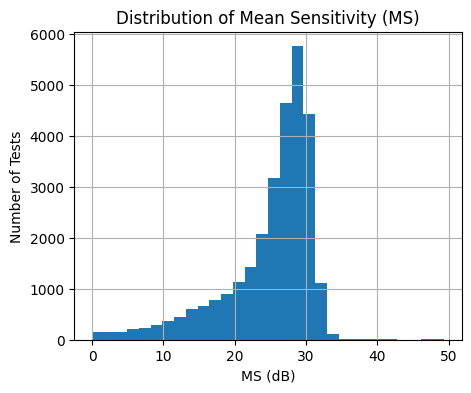

In [29]:
if "MS" in vf_df.columns:
    plt.figure(figsize=(5,4))
    vf_df["MS"].dropna().hist(bins=30)
    plt.title("Distribution of Mean Sensitivity (MS)")
    plt.xlabel("MS (dB)")
    plt.ylabel("Number of Tests")
    plt.show()

## Slope vs Follow‑Up Time

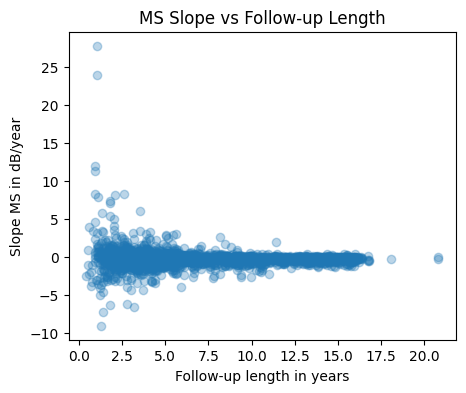

In [30]:
if {"Slope_MS", "Follow_up_length"}.issubset(series_df.columns):
    plt.figure(figsize=(5,4))
    plt.scatter(series_df["Follow_up_length"], series_df["Slope_MS"], alpha=0.3)
    plt.title("MS Slope vs Follow‑up Length")
    plt.xlabel("Follow‑up length in years")
    plt.ylabel("Slope MS in dB/year")
    plt.show()

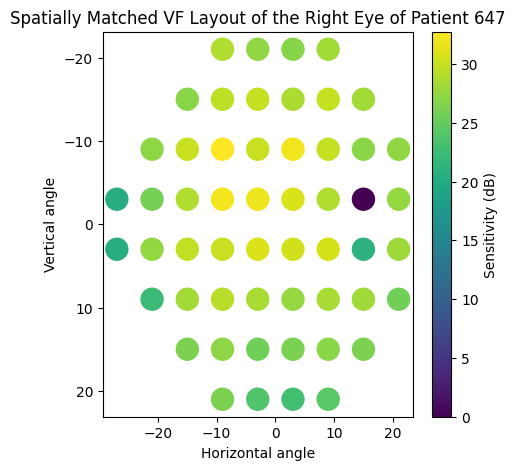

In [31]:
vf_647_right = vf_df.iloc[0]

vf_dict = {i: vf_647_right[f"Sens_{i}"] for i in range(1, 55)}

coord_df["Sensitivity"] = coord_df["LocID"].map(vf_dict)

plt.figure(figsize=(5, 5))
plt.scatter(coord_df["X"], coord_df["Y"], c=coord_df["Sensitivity"], cmap="viridis", s=250)
plt.colorbar(label="Sensitivity (dB)")
plt.title("Spatially Matched VF Layout of the Right Eye of Patient 647")
plt.xlabel("Horizontal angle")
plt.ylabel("Vertical angle")
plt.grid(False)
plt.gca().invert_yaxis()
plt.show()

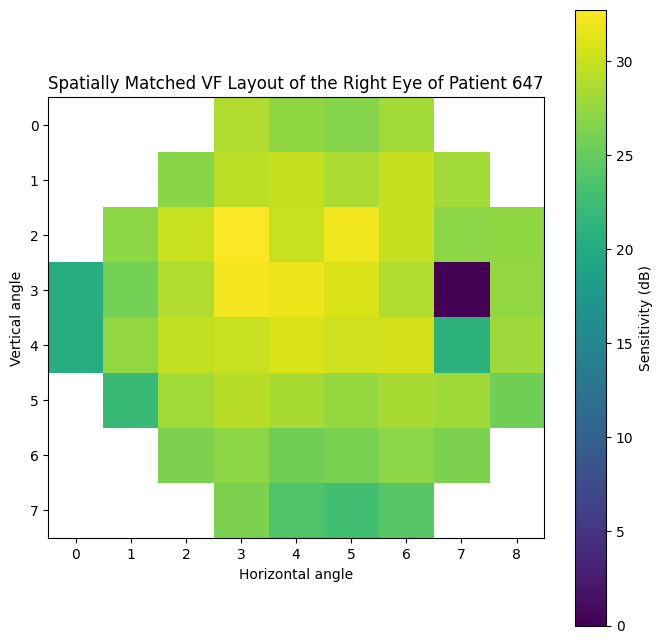

In [32]:
grid = coord_df.pivot_table(index="Y", columns="X", values="Sensitivity")
plt.figure(figsize=(8,8))
plt.imshow(grid, cmap="viridis", origin="lower")
plt.colorbar(label="Sensitivity (dB)")
plt.title("Spatially Matched VF Layout of the Right Eye of Patient 647")
plt.xlabel("Horizontal angle")
plt.ylabel("Vertical angle")
plt.gca().invert_yaxis()
plt.show()